In [6]:
#Clara de Lima Azevedo - 1897

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

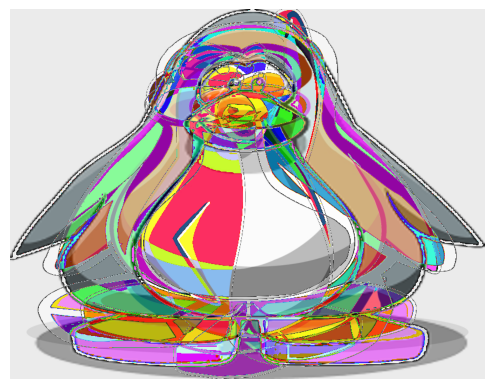

In [7]:
# 1 - junta todas as imagens em uma

path = "/kaggle/input/pinguins/"

# Abrindo e convertendo as imagens para RGB
p1 = Image.open(path + "P1.png").convert("RGB")
p2 = Image.open(path + "P2.png").convert("RGB")
p3 = Image.open(path + "P3.jpg").convert("RGB")
p4 = Image.open(path + "P4.png").convert("RGB")

# Redimensionando as imagens para o tamanho da primeira
target_size = p1.size  
p2 = p2.resize(target_size)
p3 = p3.resize(target_size)
p4 = p4.resize(target_size)

# Convertendo as imagens para arrays NumPy
p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)
p4 = np.array(p4)

# Somando as imagens e normalizando
img = p1 + p2 + p3 + p4
img = np.clip(img, 0, 255)  
img = img.astype(np.uint8)

# Exibindo a imagem resultante
plt.imshow(img)
plt.axis("off")
plt.show()

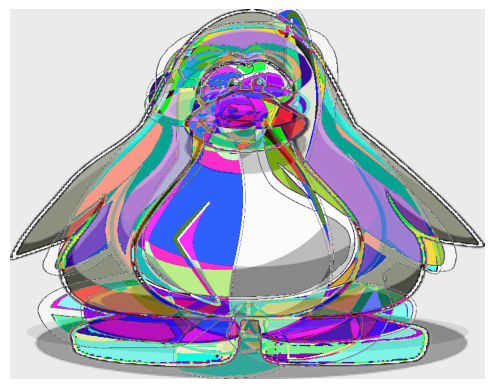

In [8]:
#2 - trocando cores da imagem
#Trocando: R → G, G → B, B → R

img_cor = img.copy()
img_cor = img_cor[:, :, [1, 2, 0]] 
plt.imshow(img_cor)
plt.axis("off")
plt.show()


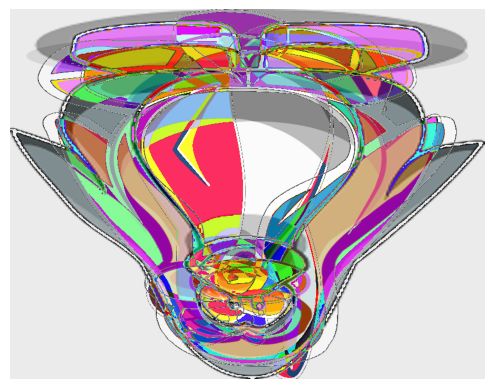

In [9]:
#3 - reflexão da imagem em x (verticalmente):

img_espelhada = np.flipud(img)
plt.imshow(img_espelhada)
plt.axis("off")
plt.show()

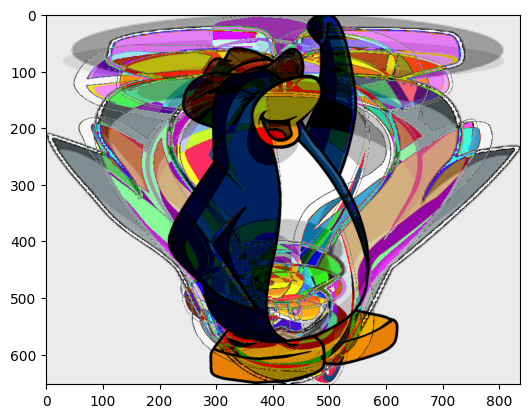

In [10]:
#4 - recortando o pinguim favorito da imagem espelhada
img_recorte = img_espelhada & p1
plt.imshow(img_recorte)

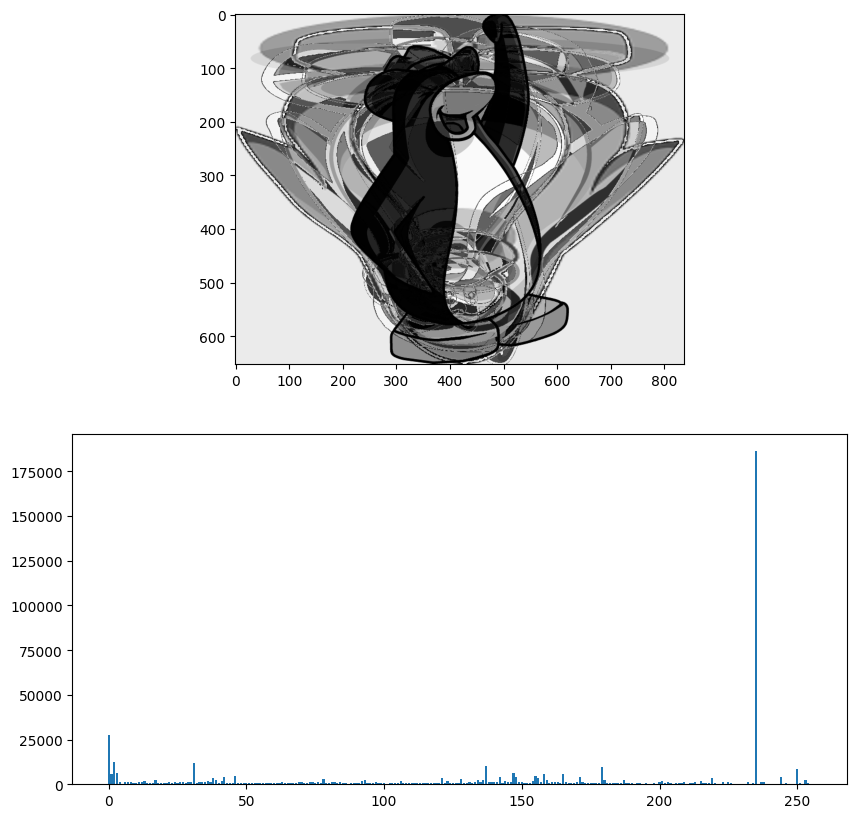

In [11]:
# 5 -  analise do histograma e escolha um valor de threshold
def grey_scale(imagem):
    (l, c, p) = imagem.shape
    img_avg = np.zeros(shape=(l, c), dtype = np.uint8)
    for i in range(l):
        for j in range(c):
            r = float(imagem[i, j, 0])
            g = float(imagem[i, j, 1])
            b = float(imagem[i, j, 2])
            img_avg[i, j] = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return img_avg

img_gray = grey_scale(img_recorte)

def histogram_gray(imagem):
    (l, c) = imagem.shape
    histogram = np.zeros(256, dtype=np.int32)
    for i in range(l):
        for j in range(c):
            intensity = imagem[i, j]
            histogram[intensity] += 1
    return histogram

def show_histogram_gray(imagem):
    histogram = histogram_gray(imagem)
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.imshow(imagem, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

show_histogram_gray(img_gray)

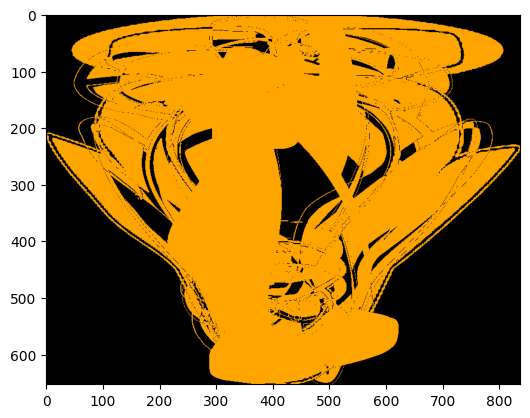

In [12]:
#6 - pintando abaixo do threshold de rosa

tinted = np.zeros((img_gray.shape[0], img_gray.shape[1], 3), dtype=np.uint8)
orange_color = np.array([255, 165, 0], dtype=np.uint8)
mask = img_gray < 200
tinted[mask] = orange_color
plt.imshow(tinted)

In [13]:
Image.fromarray(tinted).save("resultado.jpg")